## Load Data

In [0]:
# load libraries
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# local urls
uom_space_url = '../project-data/uom-space.xlsx'
rm_category_type_url = '../project-data/rm-category-type-cleaned.xlsx'
em_location_url = '../project-data/em-location.xlsx'
av_equipment_url = '../project-data/av-equipment.xlsx'
timetable_2020_url = '../project-data/2020-timetable-v2.xlsx'
floor_name_url = '../project-data/fl-name-cleaned.xlsx'
meeting_room_usage_url = '../project-data/meeting-room-usage.xlsx'

# drive urls
uom_space_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/uom-space.xlsx'
rm_category_type_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/rm-category-type-cleaned.xlsx'
em_location_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/em-location.xlsx'
av_equipment_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/av-equipment.xlsx'
timetable_2020_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/2020-timetable-v2.xlsx'
floor_name_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/fl-name-cleaned.xlsx'
meeting_room_usage_url = '/content/drive/My Drive/Mission Data Science [2019-2020]/Semester 3/MAST90106/MAST90106/project-data/meeting-room-usage.xlsx'

In [0]:
uom_space_df = pd.read_excel(uom_space_url)

In [0]:
rm_category_type_df = pd.read_excel(rm_category_type_url)

In [0]:
em_location_df = pd.read_excel(em_location_url)

In [0]:
av_equipment_df = pd.read_excel(av_equipment_url)

In [0]:
timetable_df = pd.read_excel(timetable_2020_url)

In [0]:
floor_df = pd.read_excel(floor_name_url)

In [0]:
meeting_room_usage_df = pd.read_excel(meeting_room_usage_url)

In [173]:
# data shapes
print("UOM space shape:"+str(uom_space_df.shape))
print("RM category:"+str(rm_category_type_df.shape))
print("EM location:"+str(em_location_df.shape))
print("AV equipment:"+str(av_equipment_df.shape))
print("2020 timetable:"+str(timetable_df.shape))
print("Floor data shape:"+str(floor_df.shape))
print("Meeting room usage shape:"+str(meeting_room_usage_df.shape))

UOM space shape:(22166, 14)
RM category:(209, 5)
EM location:(7709, 4)
AV equipment:(1964, 11)
2020 timetable:(119419, 26)
Floor data shape:(1369, 3)
Meeting room usage shape:(1462, 22)


## Clean + Mutate Data

In [0]:
# clean uom-space
uom_space_df['Building Name']=uom_space_df['Building Name'].astype(str).str.strip()
uom_space_df['Room Type']=uom_space_df['Room Type'].astype(str).str.strip()
uom_space_df['Room Category']=uom_space_df['Room Category'].astype(str).str.strip()
uom_space_df['Floor Code']=uom_space_df['Floor Code'].astype(str).str.strip()

In [0]:
# clean rm-category-type
rm_category_type_df['Room Type']=rm_category_type_df['Room Type'].astype(str).str.strip()
rm_category_type_df['Room Category']=rm_category_type_df['Room Category'].astype(str).str.strip()
rm_category_type_df['Room Type Abbreviation']=rm_category_type_df['Room Type Abbreviation'].str.lower().str.strip()
rm_category_type_df['Description']=rm_category_type_df['Description'].str.lower().str.strip()
rm_category_type_df['Room Type Definition']=rm_category_type_df['Room Type Definition'].str.lower().str.strip()

In [0]:
# clean floor-data
floor_df['Building Code'] = floor_df['Building Code'].astype(str).str.strip()
floor_df['Floor Code'] = floor_df['Floor Code'].astype(str).str.strip()
floor_df['Floor Name'] = floor_df['Floor Name'].astype(str).str.strip()

In [0]:
# clean em-location
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(int)
em_location_df['Floor Code'] = em_location_df['Floor Code'].astype(str).str.strip()

# clean room codes
for idx,row in em_location_df.iterrows():
    if "." in row['Room Code']:
        code = row['Room Code'].split(".")[0]
        em_location_df.at[idx,'Room Code'] = code

In [0]:
# clean av-equipment
av_equipment_df['Room Type'] = av_equipment_df['Room Type'].astype(str).str.strip()
av_equipment_df['Room Code'] = av_equipment_df['Room Code'].astype(str).str.strip()
av_equipment_df['Building Code'] = av_equipment_df['Building Code'].astype(str).str.strip()
av_equipment_df['Campus Code'] = av_equipment_df['Campus Code'].astype(str).str.strip()
av_equipment_df['Equip. Status'] = av_equipment_df['Equip. Status'].astype(str).str.strip()
av_equipment_df['Floor Code'] = av_equipment_df['Floor Code'].astype(int).astype(str).str.strip()

In [0]:
# clean timetable-df

# remove all NaN rows
timetable_df = timetable_df.dropna(how='all')

# drop duplicate records
timetable_df = timetable_df.drop_duplicates()

# dropping classes whose location is not planned
timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations'].notna()]

# dropping classes whose location is online option
timetable_df = timetable_df[timetable_df['Host Key of Allocated Locations']!='Online option.']

# dropping classes with off-site location
timetable_df = timetable_df[timetable_df['Name of Zone of Allocated Locations']!='Off-Site']

In [0]:
# mutate timetable data
building_codes = []
room_codes = []
campus_codes = []
for idx,row in timetable_df.iterrows():
    s = row['Host Key of Allocated Locations'].split('-')
    building_codes.append(s[0])
    room_codes.append(s[1])
    c = row['Name of Allocated Locations'].split('-')[0]
    if c == 'zzzPAR':
        c = 'PAR'
    campus_codes.append(c)
timetable_df['Building Code'] = building_codes
timetable_df['Room Code'] = room_codes
timetable_df['Campus Code'] = campus_codes

In [0]:
# meeting room usage cleanup
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Campus Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Building Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Floor Code'].notna()]
meeting_room_usage_df = meeting_room_usage_df[meeting_room_usage_df['Room Code'].notna()]

meeting_room_usage_df['Campus Code'] = meeting_room_usage_df['Campus Code'].astype(str).str.strip()
meeting_room_usage_df['Building Code'] = meeting_room_usage_df['Building Code'].astype(str).str.strip()
meeting_room_usage_df['Building Name'] = meeting_room_usage_df['Building Name'].astype(str).str.strip()
meeting_room_usage_df['Floor Code'] = meeting_room_usage_df['Floor Code'].astype(int).astype(str).str.strip()
meeting_room_usage_df['Room Code'] = meeting_room_usage_df['Room Code'].astype(str).str.strip()

## Merge Data

In [60]:
# Merge - uom_space + floor_data
uom_space_df_enhanced = pd.merge(uom_space_df,floor_df,on=['Building Code','Floor Code'])
print((uom_space_df.shape, uom_space_df_enhanced.shape))
print('Unable to merge records:',uom_space_df.shape[0]-uom_space_df_enhanced.shape[0])

((22166, 14), (22166, 15))
Unable to merge records: 0


In [61]:
# Merge - enhanced_uom_space + rm_category_type
# !! perfect match !!
merged_space_data_df = pd.merge(uom_space_df_enhanced,rm_category_type_df,on=['Room Category','Room Type'])
print((uom_space_df_enhanced.shape, merged_space_data_df.shape))
print('Unable to merge records:',uom_space_df_enhanced.shape[0]-merged_space_data_df.shape[0])

((22166, 15), (22166, 18))
Unable to merge records: 0


In [62]:
# merge - space_data + em_location
merged_em_location_df = pd.merge(em_location_df,merged_space_data_df,on=['Building Code','Floor Code','Room Code'])
print((em_location_df.shape, merged_em_location_df.shape))
print('Unable to merge records:',em_location_df.shape[0]-merged_em_location_df.shape[0])

((7709, 4), (6962, 19))
Unable to merge records: 747


In [63]:
# merge - space_data + av_equipment
merged_av_equipment_df = pd.merge(av_equipment_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
print((av_equipment_df.shape, merged_av_equipment_df.shape))
print('Unable to merge records:',av_equipment_df.shape[0]-merged_av_equipment_df.shape[0])

((1964, 11), (1646, 25))
Unable to merge records: 318


In [64]:
# merge - space_data + timetable_data
merged_timetable_df = pd.merge(timetable_df,merged_space_data_df,on=['Campus Code','Building Code','Room Code'])
print((timetable_df.shape, merged_timetable_df.shape))
print('Unable to merge records:',timetable_df.shape[0]-merged_timetable_df.shape[0])

((119419, 26), (116981, 41))
Unable to merge records: 2438


In [175]:
# merge - space_data + meeting_room_usage
merged_meeting_room_usage_df = pd.merge(meeting_room_usage_df,merged_space_data_df,on=['Campus Code','Building Code','Floor Code','Room Code'])
print((meeting_room_usage_df.shape, merged_meeting_room_usage_df.shape))
print('Unable to merge records:',meeting_room_usage_df.shape[0]-merged_meeting_room_usage_df.shape[0])

((890, 22), (728, 36))
Unable to merge records: 162


## Meeting Rooms Analysis (Parkville Campus)

In [0]:
merged_space_data_df_PAR = merged_space_data_df[merged_space_data_df['Campus Code']=='PAR']
merged_em_location_df_PAR = merged_em_location_df[merged_em_location_df['Campus Code']=='PAR']
merged_av_equipment_df_PAR = merged_av_equipment_df[merged_av_equipment_df['Campus Code']=='PAR']
merged_meeting_room_usage_df_PAR = merged_meeting_room_usage_df[merged_meeting_room_usage_df['Campus Code']=='PAR']
# merged_timetable_df_PAR = merged_timetable_df[merged_timetable_df['Campus Code']=='PAR']

### Supply of Meeting Rooms?

In [34]:
# possible meeting rooms
possible_rooms = rm_category_type_df[rm_category_type_df['Room Type'].str.contains("601|629")]
meeting_room_types = possible_rooms['Room Type'].tolist()

# supply of meeting rooms
possible_meeting_rooms_df = merged_space_data_df_PAR[merged_space_data_df_PAR['Room Type'].isin(meeting_room_types)]
possible_meeting_rooms_df.shape

(692, 18)

### Demand of Meeting Rooms?

In [35]:
# Number of staff members data in parkville
merged_em_location_df_PAR.shape

(6505, 19)

### Supply vs Demand analysis of preferences/factors?

#### 1. What if staff want to book a meeting room in the **same building**?

##### Count graphs

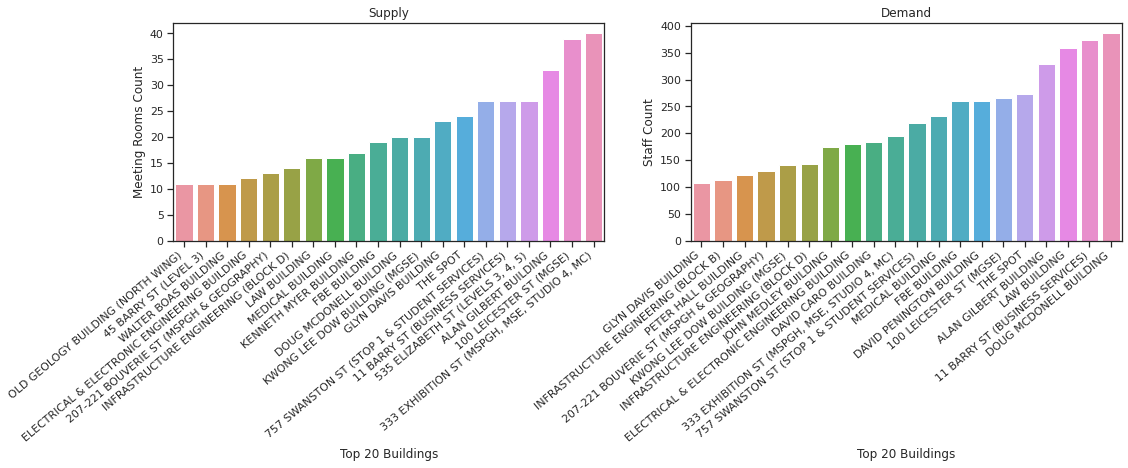

In [66]:
#@title
gdf1 = possible_meeting_rooms_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Room Code', data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Buildings', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Building Name", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Buildings', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

##### Proportions graphs

In [0]:
#@title
total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

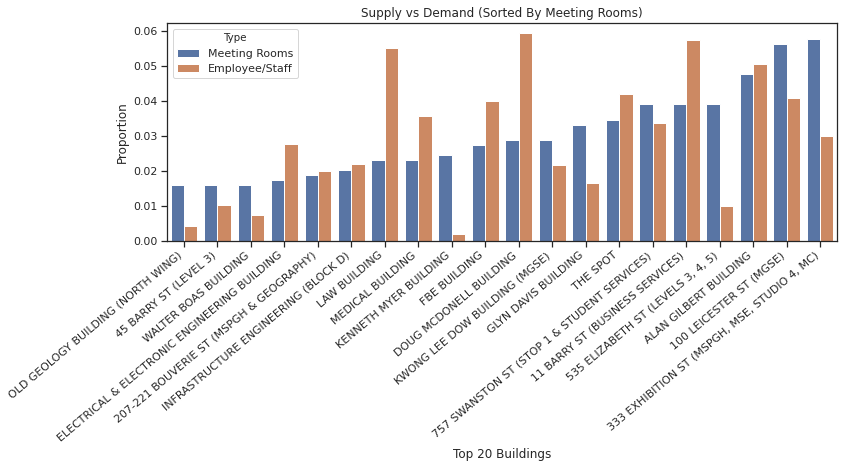

In [38]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

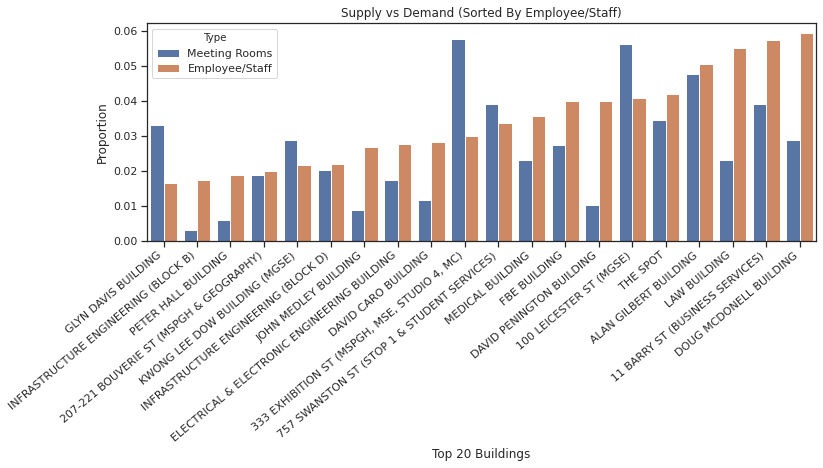

In [39]:
#@title
gd = pd.merge(gdf2, gdf1, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Employee/Staff)")
plt.show()

#### 2. What if staff wants to book a meeting room at the **same floor**?

##### Where most of the meeting rooms are available vs Where most of the employee/staff members are sitting ?

In [0]:
#@title
# 333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Building Name']=='333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Floor Name'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

merged_em_location_df_f = merged_em_location_df[merged_em_location_df['Building Name']=='333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC)']
gdf2 = merged_em_location_df_f.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

In [0]:
#@title
possible_meeting_rooms_df_f_2 = possible_meeting_rooms_df[possible_meeting_rooms_df['Building Name']=='DOUG MCDONELL BUILDING']
gdf3 = possible_meeting_rooms_df_f_2.groupby(by=['Floor Name'], as_index=False).agg({'Room Code': pd.Series.nunique})
gdf3.sort_values(by=['Room Code'], inplace=True)

merged_em_location_df_f_2 = merged_em_location_df[merged_em_location_df['Building Name']=='DOUG MCDONELL BUILDING']
gdf4 = merged_em_location_df_f_2.groupby(by='Floor Name', as_index=False).agg({'Employee Sequential ID': pd.Series.nunique})
gdf4.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf3['Room Code'].sum()
gdf3['Room Code'] = gdf3['Room Code']/total_rooms

total_emp = gdf4['Employee Sequential ID'].sum()
gdf4['Employee Sequential ID'] = gdf4['Employee Sequential ID']/total_emp

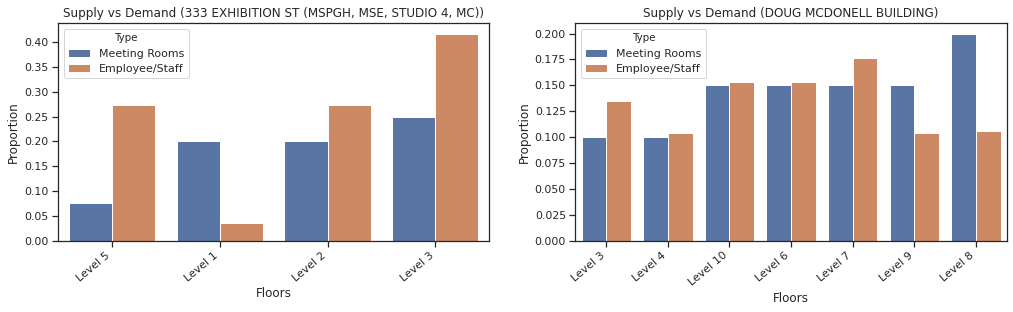

In [69]:
#@title
# proportion graph
gd1 = pd.merge(gdf1, gdf2, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd1.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

# proportion graph
gd2 = pd.merge(gdf3, gdf4, on=['Floor Name'])
d = {
    'Floor Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd2.iterrows():
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Floor Name'].append(row['Floor Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Floors', ylabel='Proportion')
ax1.set_title("Supply vs Demand (333 EXHIBITION ST (MSPGH, MSE, STUDIO 4, MC))")

ax2 = sns.barplot(x="Floor Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Floors', ylabel='Proportion')
ax2.set_title("Supply vs Demand (DOUG MCDONELL BUILDING)")

plt.show()

#### 3. What if staff wants to book a meeting room **closest** to where the staff is sitting?

- We need to do spatial analysis
- More data is needed: coordinates and arrangement of room codes
- Floor plan of the building

#### 4. What if staff wants to book a meeting room with **equipments**?



##### How many meeting rooms are available with equipments?

In [43]:
# 601,629 are possible room types for meeting rooms
av_meeting_rooms_df = merged_av_equipment_df_PAR[merged_av_equipment_df_PAR['Room Type_x'].str.contains('601|629')]
av_meeting_rooms_df.shape

(90, 25)

##### What are different manufacturers and equipment standards available in the meeting rooms?

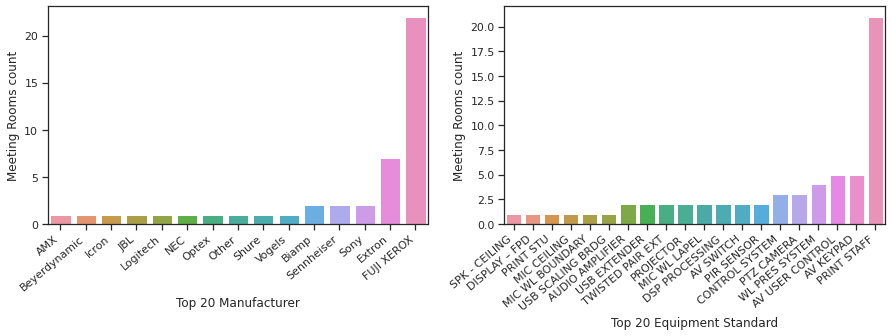

In [44]:
#@title
gdf1 = av_meeting_rooms_df.groupby(by='Manufacturer', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = av_meeting_rooms_df.groupby(by='Equipment Standard', as_index=False).agg({'Room Code': pd.Series.nunique})
gdf2.sort_values(by=['Room Code'], inplace=True)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(15)
ax1 = sns.barplot(x="Manufacturer", y='Room Code', data=gdf1.tail(20), ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Manufacturer', ylabel='Meeting Rooms count')

ax2 = sns.barplot(x="Equipment Standard", y='Room Code', data=gdf2.tail(20), ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Equipment Standard', ylabel='Meeting Rooms count')

plt.show()

##### Proportion graph across buildings?

In [0]:
#@title
gdf1 = av_meeting_rooms_df.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Equipment Code': pd.Series.nunique})
gdf1.sort_values(by=['Equipment Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_eqp = gdf1['Equipment Code'].sum()
gdf1['Equipment Code'] = gdf1['Equipment Code']/total_eqp

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

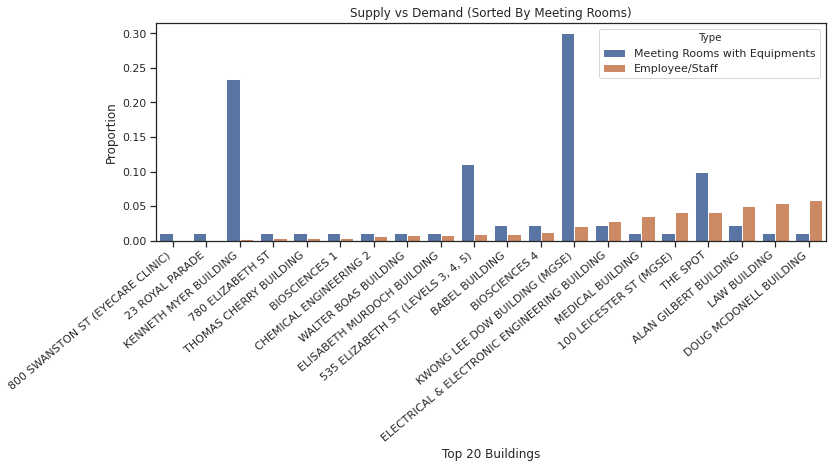

In [72]:
#@title
# proportion graph
gd = pd.merge(gdf2, gdf1, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms with Equipments')
    d['Value'].append(row['Equipment Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Buildings', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

#### 5. What if staff wants to book a meeting room in the **same department**?

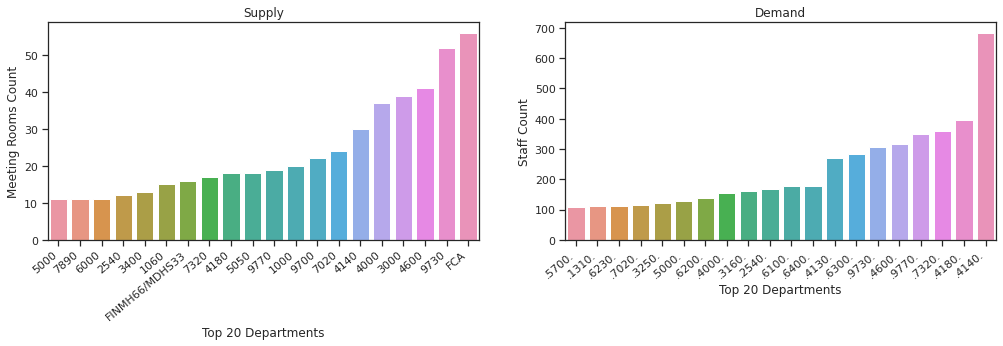

In [80]:
#@title
gdf1 = possible_meeting_rooms_df.groupby(by=['Department Code'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df.groupby(by=['Department Code'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

gdf2['Department Code 2'] = gdf2['Department Code']
for idx,row in gdf2.iterrows():
    gdf2.at[idx,'Department Code 2'] = '.'+row['Department Code 2']+'.'

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Department Code", y='Room Code', data=gdf1.tail(20),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 20 Departments', ylabel='Meeting Rooms Count')
ax1.set_title('Supply')

ax2 = sns.barplot(x="Department Code 2", y='Employee Sequential ID', data=gdf2.tail(20),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 20 Departments', ylabel='Staff Count')
ax2.set_title('Demand')

plt.show()

In [0]:
#@title
# proportion graph
total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

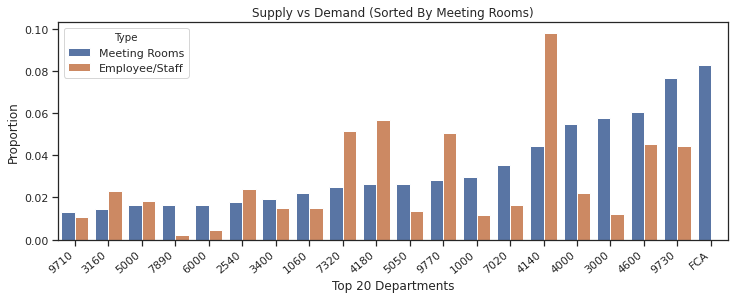

In [82]:
#@title
gd = pd.merge(gdf1, gdf2, on=['Department Code'])
d = {
    'Department Code':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Department Code'].append(row['Department Code'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df = pd.DataFrame(data=d)
plt.figure(figsize=(12,4))
ax = sns.barplot(x="Department Code", y='Value', hue='Type', dodge=True, data=df.tail(40));
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Top 20 Departments', ylabel='Proportion')
ax.set_title("Supply vs Demand (Sorted By Meeting Rooms)")
plt.show()

#### 6. What if staff wants to book a meeting room with 'Good or Excellent' **Room Condition**?

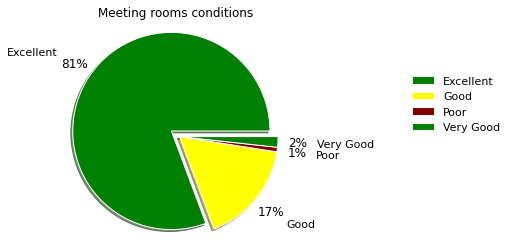

In [129]:
#@title
# meeting room conditions
gdf = possible_meeting_rooms_df.groupby(by=['Room Condition 2018'], as_index=False).agg({'Room Code': pd.Series.nunique})
total_rooms = gdf['Room Code'].sum()
gdf['Room Code'] = (gdf['Room Code']/total_rooms)*100
gdf.sort_values(by=['Room Condition 2018'], inplace=True)
fig, ax = plt.subplots()
plt.rcParams['text.color'] = '#000'
plt.rcParams['axes.labelcolor']= '#000'
plt.rcParams['xtick.color'] = '#000'
plt.rcParams['ytick.color'] = '#000'
labels = gdf['Room Condition 2018'].tolist()
percentages = gdf['Room Code'].tolist()
color_palette_list = ['#008000', '#FFFF00', '#800000', '#00FF00']
explode=(0.1,0,0,0)
ax.pie(percentages, explode=explode, labels=labels,autopct='%1.0f%%', 
        colors = color_palette_list[0:3],
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Meeting rooms conditions")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [0]:
#@title
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Room Condition 2018']=='Excellent']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf2.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_emp = gdf2['Employee Sequential ID'].sum()
gdf2['Employee Sequential ID'] = gdf2['Employee Sequential ID']/total_emp

In [0]:
#@title
possible_meeting_rooms_df_f = possible_meeting_rooms_df[possible_meeting_rooms_df['Room Condition 2018']=='Good']
gdf3 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf3.sort_values(by=['Room Code'], inplace=True)

gdf4 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf4.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf3['Room Code'].sum()
gdf3['Room Code'] = gdf3['Room Code']/total_rooms

total_emp = gdf4['Employee Sequential ID'].sum()
gdf4['Employee Sequential ID'] = gdf4['Employee Sequential ID']/total_emp

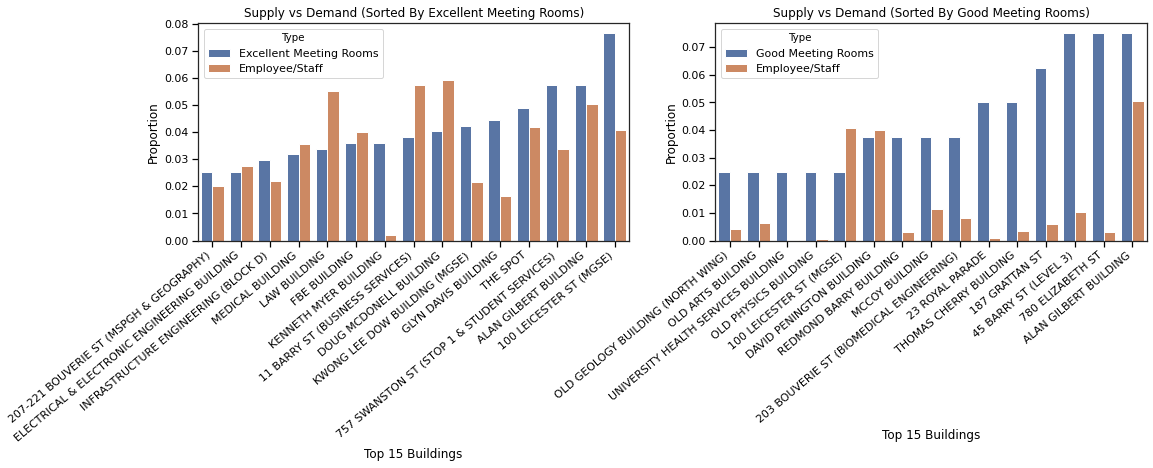

In [152]:
#@title
# proportion graph
gd = pd.merge(gdf1, gdf2, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Excellent Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

gd = pd.merge(gdf3, gdf4, on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Good Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df1.tail(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Supply vs Demand (Sorted By Excellent Meeting Rooms)")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Supply vs Demand (Sorted By Good Meeting Rooms)")

plt.show()

#### 7. What if staff wants to book a meeting room which is **easily available**?

In [178]:
# usage data provided
meeting_room_usage_data = pd.merge(merged_meeting_room_usage_df_PAR,possible_meeting_rooms_df,on=['Building Code','Floor Code','Room Code'])
meeting_room_usage_data.shape

(373, 51)

In [0]:
#@title
# total Number of meetings
gdf1 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf2.sort_values(by=['Meetings'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

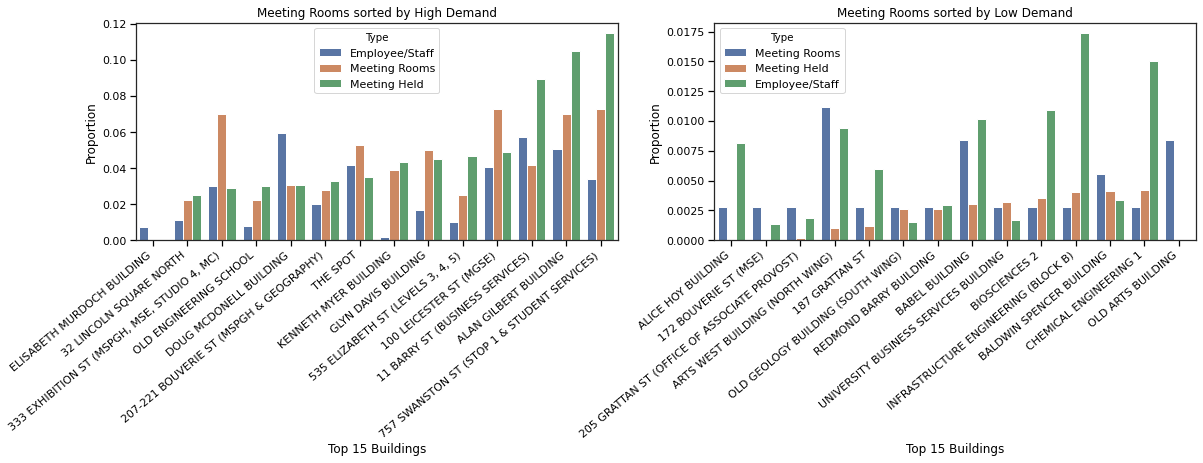

In [227]:
#@title
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])

df = pd.DataFrame(data=d)
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(19)
df1 = df.tail(40)
#df1.sort_values(by=['Type'], inplace=True)
df2 = df.head(40)
#df2.sort_values(by=['Type'], inplace=True)
ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True,data=df1,ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Meeting Rooms sorted by High Demand")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2,ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Meeting Rooms sorted by Low Demand")
 
plt.show()

##### Is Room Condition factor for Meeting room usage?

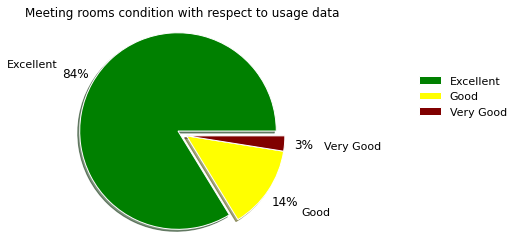

In [234]:
#@title
# meeting room conditions
gdf = meeting_room_usage_data.groupby(by=['Room Condition 2018_x'], as_index=False).agg({'Room Code': pd.Series.nunique})
total_rooms = gdf['Room Code'].sum()
gdf['Room Code'] = (gdf['Room Code']/total_rooms)*100
gdf.sort_values(by=['Room Condition 2018_x'], inplace=True)
fig, ax = plt.subplots()
plt.rcParams['text.color'] = '#000'
plt.rcParams['axes.labelcolor']= '#000'
plt.rcParams['xtick.color'] = '#000'
plt.rcParams['ytick.color'] = '#000'
labels = gdf['Room Condition 2018_x'].tolist()
percentages = gdf['Room Code'].tolist()
color_palette_list = ['#008000', '#FFFF00', '#800000', '#00FF00']
explode=(0.1,0,0)
ax.pie(percentages, explode=explode, labels=labels,autopct='%1.0f%%', 
        colors = color_palette_list[0:3],
       shadow=True, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Meeting rooms condition with respect to usage data")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

In [0]:
#@title
possible_meeting_rooms_df_f = meeting_room_usage_data[meeting_room_usage_data['Room Condition 2018_x']=='Excellent']
gdf1 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf1.sort_values(by=['Room Code'], inplace=True)

gdf2 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf2.sort_values(by=['Meetings'], inplace=True)

gdf3 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf3.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf1['Room Code'].sum()
gdf1['Room Code'] = gdf1['Room Code']/total_rooms

total_meetings = gdf2['Meetings'].sum()
gdf2['Meetings'] = gdf2['Meetings']/total_meetings

total_emp = gdf3['Employee Sequential ID'].sum()
gdf3['Employee Sequential ID'] = gdf3['Employee Sequential ID']/total_emp

In [0]:
#@title
possible_meeting_rooms_df_f = meeting_room_usage_data[meeting_room_usage_data['Room Condition 2018_x']=='Good']
gdf4 = possible_meeting_rooms_df_f.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Room Code':pd.Series.nunique})
gdf4.sort_values(by=['Room Code'], inplace=True)

gdf5 = meeting_room_usage_data.groupby(by=['Building Code','Building Name'], as_index=False)['Meetings'].sum()
gdf5.sort_values(by=['Meetings'], inplace=True)

gdf6 = merged_em_location_df_PAR.groupby(by=['Building Code','Building Name'], as_index=False).agg({'Employee Sequential ID':pd.Series.nunique})
gdf6.sort_values(by=['Employee Sequential ID'], inplace=True)

total_rooms = gdf4['Room Code'].sum()
gdf4['Room Code'] = gdf4['Room Code']/total_rooms

total_meetings = gdf5['Meetings'].sum()
gdf5['Meetings'] = gdf5['Meetings']/total_meetings

total_emp = gdf6['Employee Sequential ID'].sum()
gdf6['Employee Sequential ID'] = gdf6['Employee Sequential ID']/total_emp

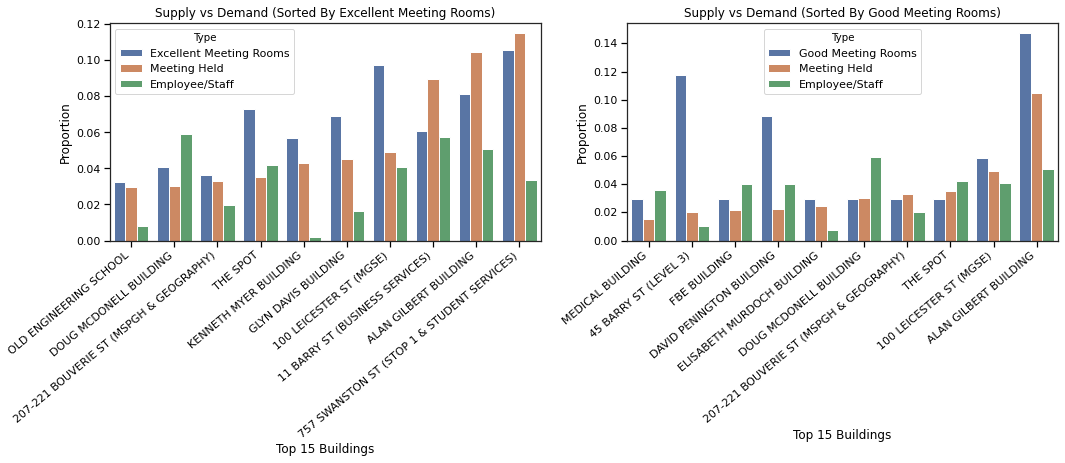

In [241]:
#@title
# proportion graph
gd = pd.merge(pd.merge(gdf2, gdf1, on=['Building Code','Building Name']),gdf3,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Excellent Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df1 = pd.DataFrame(data=d)

gd = pd.merge(pd.merge(gdf5, gdf4, on=['Building Code','Building Name']),gdf6,on=['Building Code','Building Name'])
d = {
    'Building Code':[],
    'Building Name':[],
    'Type':[],
    'Value':[]
}
for idx,row in gd.iterrows():
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Good Meeting Rooms')
    d['Value'].append(row['Room Code'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Meeting Held')
    d['Value'].append(row['Meetings'])
    d['Building Code'].append(row['Building Code'])
    d['Building Name'].append(row['Building Name'])
    d['Type'].append('Employee/Staff')
    d['Value'].append(row['Employee Sequential ID'])
df2 = pd.DataFrame(data=d)

fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(17)

ax1 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df1.tail(30),ax=ax[0]);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax1.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax1.set_title("Supply vs Demand (Sorted By Excellent Meeting Rooms)")

ax2 = sns.barplot(x="Building Name", y='Value', hue='Type', dodge=True, data=df2.tail(30),ax=ax[1]);
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax2.set(xlabel='Top 15 Buildings', ylabel='Proportion')
ax2.set_title("Supply vs Demand (Sorted By Good Meeting Rooms)")

plt.show()